In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df =pd.read_csv('ratings data.csv')

In [3]:
df.head()

,Review,Rating
0,Perfect product!,5
1,Perfect product!,5
2,Highly recommended,5
3,Classy product,5
4,Worth every penny,5


In [4]:
df.shape

(23555, 2)

There are 22489 entries with one feature and one target.

The review column consists of text data i.e. the written reviews by the consumers which needs to be processed and classified into ratings(1-5).

In [5]:
df.isnull().sum()

Review    1
Rating    0
dtype: int64

There is one missing entry in the review column, we will drop that entry as it has no input

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [8]:
# Importing necessary libraries for text processing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
import re

In [9]:
# all text to lower case
df['Review']=df['Review'].str.lower()

# removing punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]','')

# removing numbers
df['Review'] = df['Review'].str.replace(r'[^a-zA-z.,!?/:;\"\'\s]','')

# removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
# looking at the rare words

freq = pd.Series(' '.join(df['Review']).split()).value_counts()[-20:] # 10 rare words
freq = list(freq.index)
freq

['valuethey',
 'announced',
 'appsong',
 'thirchindhi',
 'syn',
 'cryi',
 'evaporate',
 'impressivebut',
 'uncontrolled',
 'axcording',
 'largen',
 'planet',
 'cabe',
 'meaningless',
 'chargeryou',
 'kin',
 'goodies',
 'designhappy',
 'exoect',
 'sometimesbattery']

In [11]:
# common words

from collections import Counter
cnt = Counter()
for text in df["Review"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('good', 8923),
 ('product', 6502),
 ('quality', 4110),
 ('sound', 3549),
 ('working', 2058),
 ('nice', 1970),
 ('buy', 1959),
 ('one', 1941),
 ('bad', 1895),
 ('battery', 1798),
 ('price', 1778),
 ('dont', 1744),
 ('laptop', 1575),
 ('bass', 1533),
 ('money', 1492),
 ('also', 1487),
 ('best', 1396),
 ('use', 1394),
 ('range', 1284),
 ('time', 1213)]

In [12]:
#pip install emot --upgrade

In [13]:
import emot

In [14]:
# pip install unicode-emoji

In [15]:
# tokenization
df['tok_text'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

df.head()

,Review,Rating,tok_text
0,perfect product,5,"[perfect, product]"
1,perfect product,5,"[perfect, product]"
2,highly recommended,5,"[highly, recommended]"
3,classy product,5,"[classy, product]"
4,worth every penny,5,"[worth, every, penny]"


In [16]:
# all text to lower case
df['Review']=df['Review'].str.lower()

# removing non-ascii
df['Review'] = df['Review'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

# removing punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]','')

# removing numbers
df['Review'] = df['Review'].str.replace(r'[^a-zA-z.,!?/:;\"\'\s]','')

# removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# tokenization
df['tok_text'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

df.head()

,Review,Rating,tok_text
0,perfect product,5,"[perfect, product]"
1,perfect product,5,"[perfect, product]"
2,highly recommended,5,"[highly, recommended]"
3,classy product,5,"[classy, product]"
4,worth every penny,5,"[worth, every, penny]"


1    6573
4    4614
3    4549
5    4371
2    3447
Name: Rating, dtype: int64


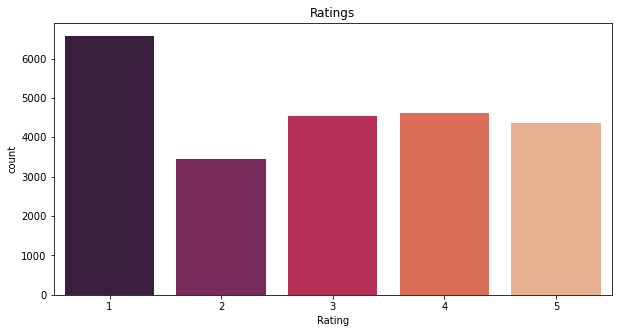

In [17]:
# Countplot of the target

print(df['Rating'].value_counts())
plt.figure(figsize=(10,5),)
sns.countplot(df['Rating'],palette='rocket')
plt.title('Ratings')
plt.show()

In [18]:
# creating a new column containing the number of words

df['word_count'] = df.tok_text.str.len()
df.head()

,Review,Rating,tok_text,word_count
0,perfect product,5,"[perfect, product]",2
1,perfect product,5,"[perfect, product]",2
2,highly recommended,5,"[highly, recommended]",2
3,classy product,5,"[classy, product]",2
4,worth every penny,5,"[worth, every, penny]",3


10


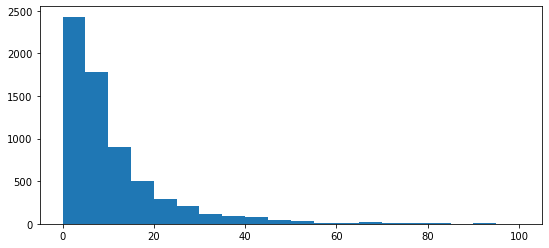

8


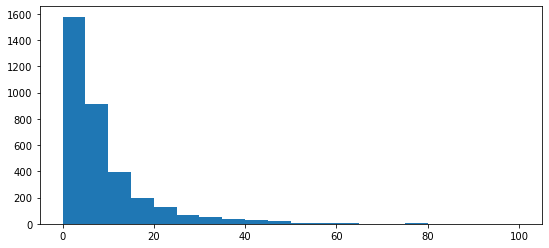

9


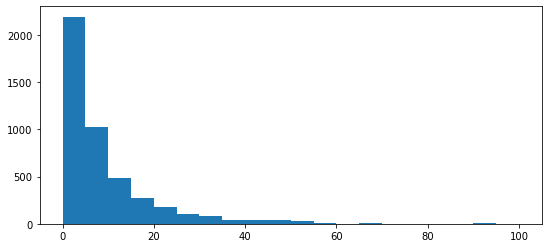

10


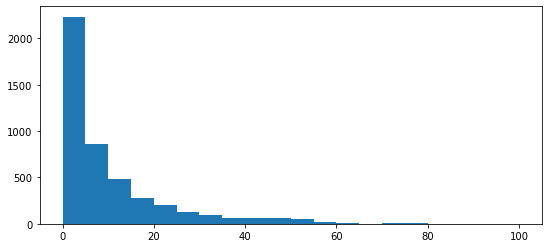

10


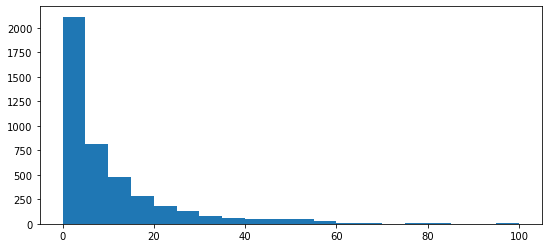

In [19]:
# Histograms to understand the distribution of word_count in different ratings.

st1 = df[df['Rating']==1]
st2 = df[df['Rating']==2]
st3 = df[df['Rating']==3]
st4 = df[df['Rating']==4]
st5 = df[df['Rating']==5]
for i in [st1,st2,st3,st4,st5]:
    plt.figure(figsize=(9,4))
    plt.hist(i['word_count'],bins=20,range = (0,100))
    print(int(i['word_count'].mean()))
    plt.show()

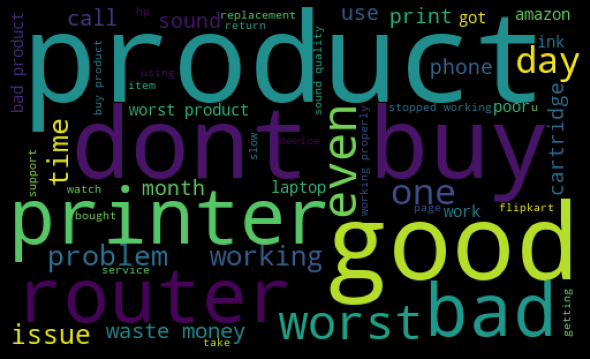

In [20]:
# Getting sense of loud words in different ratings

from wordcloud import WordCloud
s1 = df['Review'][df['Rating']==1]
s1_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s1))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

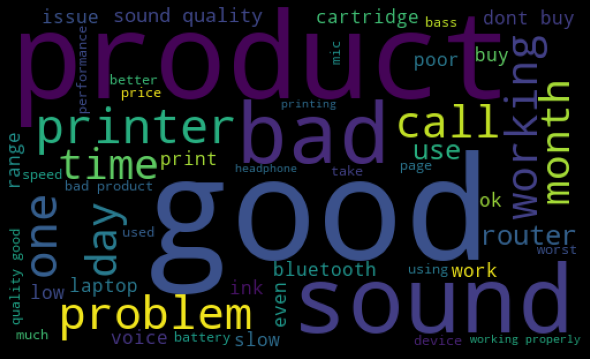

In [21]:
from wordcloud import WordCloud
s2 = df['Review'][df['Rating']==2]
s2_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s2))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s2_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

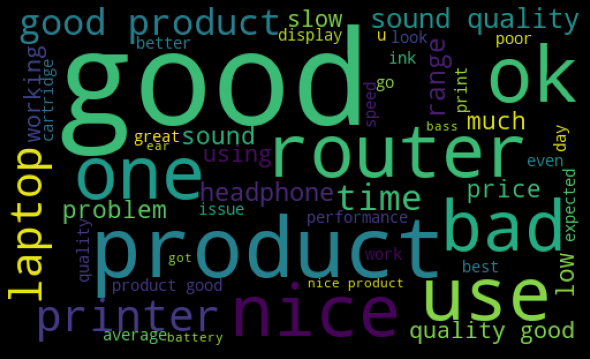

In [22]:
from wordcloud import WordCloud
s3 = df['Review'][df['Rating']==3]
s3_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s3))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s3_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

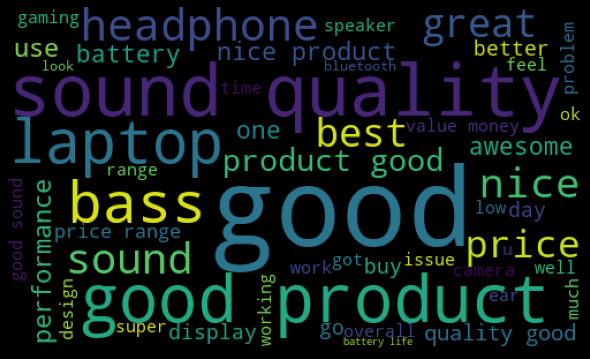

In [23]:
from wordcloud import WordCloud
s4 = df['Review'][df['Rating']==4]
s4_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s4))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s4_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

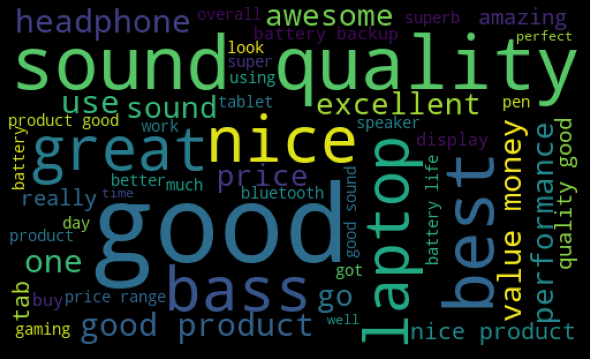

In [24]:
from wordcloud import WordCloud
s5 = df['Review'][df['Rating']==5]
s5_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s5))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
# Vectorization with Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(preprocessor=' '.join, stop_words='english',max_features=5000)
tfidf.fit(df['tok_text'])

TfidfVectorizer(max_features=5000,
                preprocessor=<built-in method join of str object at 0x000002500B4D6B70>,
                stop_words='english')

In [26]:
# declaring input and target

x = tfidf.transform(df['tok_text']) 
y = df['Rating']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0,stratify=y)

In [29]:
# Running multiple models and evaluating the performance

model = [MultinomialNB(),DecisionTreeClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy score of", m,"is",accuracy_score(y_test,pred))
    print("Confusion matrix: \n",confusion_matrix(y_test,pred))
    print("Classification report: \n",classification_report(y_test,pred))
    print("\n")

Accuracy score of MultinomialNB() is 0.5151772447463383
Confusion matrix: 
 [[1126   24   66   67   32]
 [ 471   51   79   61   27]
 [ 236   10  296  271   97]
 [  67    5   87  479  285]
 [  68    3   38  290  475]]
Classification report: 
               precision    recall  f1-score   support

           1       0.57      0.86      0.69      1315
           2       0.55      0.07      0.13       689
           3       0.52      0.33      0.40       910
           4       0.41      0.52      0.46       923
           5       0.52      0.54      0.53       874

    accuracy                           0.52      4711
   macro avg       0.51      0.46      0.44      4711
weighted avg       0.52      0.52      0.48      4711



Accuracy score of DecisionTreeClassifier() is 0.4272978136276799
Confusion matrix: 
 [[843 190 152  84  46]
 [303 156 124  74  32]
 [178  91 264 258 119]
 [ 69  49 134 406 265]
 [ 89  32  95 314 344]]
Classification report: 
               precision    recall  f1-sco

In [30]:
# hyperparameter tuning with gridsearchCV on SVC

from sklearn.model_selection import GridSearchCV
svc = SVC()
p = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],'kernel': ['rbf','linear']} 
a = GridSearchCV(svc,p,cv=3)
a.fit(x,y)
a.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
# SVM after hyperparameter tuning

svc = SVC(C=1,gamma=1,kernel='rbf')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy score of", svc,"is",accuracy_score(y_test,pred))
print("Confusion matrix: \n",confusion_matrix(y_test,pred))
print("Classification report: \n",classification_report(y_test,pred))

Accuracy score of SVC(C=1, gamma=1) is 0.5238802801952877
Confusion matrix: 
 [[1072   69   93   57   24]
 [ 414  104  104   48   19]
 [ 183   35  347  259   86]
 [  56   15   97  493  262]
 [  61    9   54  298  452]]
Classification report: 
               precision    recall  f1-score   support

           1       0.60      0.82      0.69      1315
           2       0.45      0.15      0.23       689
           3       0.50      0.38      0.43       910
           4       0.43      0.53      0.47       923
           5       0.54      0.52      0.53       874

    accuracy                           0.52      4711
   macro avg       0.50      0.48      0.47      4711
weighted avg       0.51      0.52      0.50      4711



In [34]:
# Saving the model

import joblib
joblib.dump(svc,'ratings.pkl')

['ratings.pkl']